<a href="https://colab.research.google.com/github/mathena828/CIFAR-10_MLP_CNN/blob/cnn-version-2/CIFAR_10_MLP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint

# Import CIFAR-10 dataset
from keras.datasets import cifar10

<h1>Multilayer Perceptron (MLP)</h1>

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
# Convert label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images to 3072-dimensional vectors and normalize the pixel values
x_train = np.reshape(x_train, (-1, 3072))
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test,(-1, 3072))
x_test = x_test.astype('float32') / 255

In [ ]:
visible = Input(shape=(3072,))
hidden_1 = Dense(1024, activation='relu')(visible)
hidden_2 = Dense(512, activation='relu')(hidden_1)
hidden_3 = Dense(128, activation='relu')(hidden_2)
output = Dense(10, activation='softmax')(hidden_3)
model = Model(inputs=visible, outputs=output)
model.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model = Sequential(name='MLP')
# model.add(Dense(2048, input_dim=3072, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(502, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# model.summary()

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath="checkpoints/mlp", verbose=False, save_best_only = True)
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=128, callbacks=[checkpoint])
# Evaluate the model
loss, accuracy = model.evaluate(x_test,
                           y_test, 
                           batch_size=128,
                           verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * accuracy))

Epoch 1/25
391/391 [==============================] - 22s 55ms/step - loss: 1.2147 - accuracy: 0.5732 - val_loss: 1.4020 - val_accuracy: 0.4974
Epoch 2/25
391/391 [==============================] - 21s 54ms/step - loss: 1.1965 - accuracy: 0.5804 - val_loss: 1.6182 - val_accuracy: 0.4346
Epoch 3/25
391/391 [==============================] - 21s 55ms/step - loss: 1.1839 - accuracy: 0.5887 - val_loss: 1.3467 - val_accuracy: 0.5243
Epoch 4/25
391/391 [==============================] - 21s 53ms/step - loss: 1.1691 - accuracy: 0.5922 - val_loss: 1.4187 - val_accuracy: 0.4960
Epoch 5/25
391/391 [==============================] - 21s 54ms/step - loss: 1.1579 - accuracy: 0.5933 - val_loss: 1.3284 - val_accuracy: 0.5282
Epoch 6/25
391/391 [==============================] - 21s 54ms/step - loss: 1.1499 - accuracy: 0.5990 - val_loss: 1.4120 - val_accuracy: 0.5032
Epoch 7/25
391/391 [==============================] - 21s 53ms/step - loss: 1.1296 - accuracy: 0.6048 - val_loss: 1.3766 - val_accuracy:

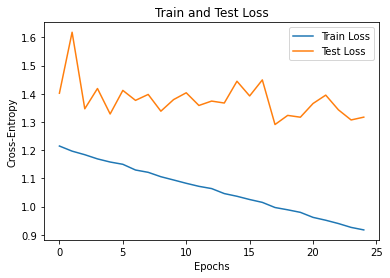

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

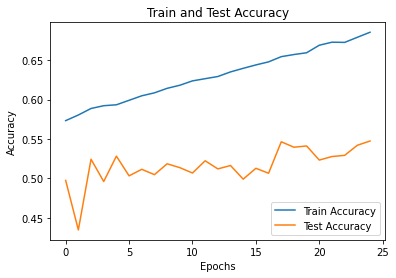

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()

<h1>Convolutional Neural Network (CNN)</h1>

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
# Convert label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Normalize the pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
visible = Input(shape=(32,32,3))
conv_1 = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(visible)
pool_1 = MaxPooling2D(pool_size=(2))(conv_1)
conv_2 = Conv2D(64, kernel_size=4, strides=1, padding='same', activation='relu')(pool_1)
pool_2 = MaxPooling2D(pool_size=(2))(conv_2)
conv_3 = Conv2D(128, kernel_size=4, strides=1, padding='same', activation='relu')(pool_2)
pool_3 = MaxPooling2D(pool_size=(2))(conv_3)
pool_3 = Dropout(0.2)(pool_3)
flat = Flatten()(pool_3)
flat = Dropout(0.2)(flat)
hidden_1 = Dense(512, activation='relu')(flat)
hidden_1 = Dropout(0.2)(hidden_1)
output = Dense(10, activation='softmax')(hidden_1)
model = Model(inputs=visible, outputs=output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath="checkpoints/cnn", verbose = False, save_best_only = True)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=128, callbacks=[checkpoint])
# Evaluate the model
loss, accuracy = model.evaluate(x_test,
                           y_test, 
                           batch_size=128,
                           verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * accuracy))

Epoch 1/25
391/391 [==============================] - 183s 469ms/step - loss: 1.0790 - accuracy: 0.6169 - val_loss: 1.0311 - val_accuracy: 0.6345
Epoch 2/25
391/391 [==============================] - 187s 478ms/step - loss: 1.0632 - accuracy: 0.6239 - val_loss: 1.0147 - val_accuracy: 0.6399
Epoch 3/25
391/391 [==============================] - 183s 469ms/step - loss: 1.0490 - accuracy: 0.6299 - val_loss: 0.9890 - val_accuracy: 0.6499
Epoch 4/25
391/391 [==============================] - 182s 467ms/step - loss: 1.0306 - accuracy: 0.6370 - val_loss: 0.9920 - val_accuracy: 0.6533
Epoch 5/25
391/391 [==============================] - 187s 478ms/step - loss: 1.0167 - accuracy: 0.6401 - val_loss: 0.9887 - val_accuracy: 0.6534
Epoch 6/25
391/391 [==============================] - 184s 471ms/step - loss: 1.0016 - accuracy: 0.6461 - val_loss: 0.9637 - val_accuracy: 0.6615
Epoch 7/25
391/391 [==============================] - 184s 470ms/step - loss: 0.9873 - accuracy: 0.6524 - val_loss: 0.9542 -

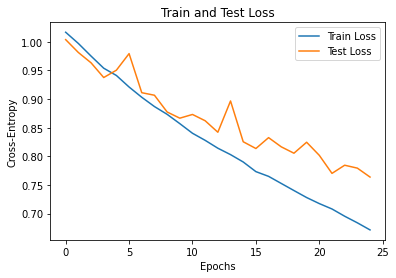

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

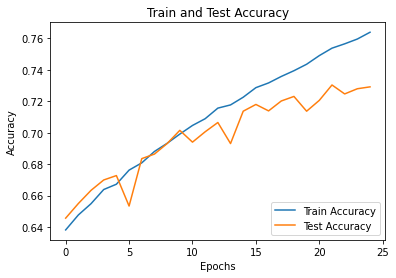

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="lower right")
plt.show()